In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Union, Tuple, List, Any, Optional
import plotly.graph_objects as go


import pickle
with open('/content/drive/MyDrive/Math 628/data/ticker_data_dict.pkl', 'rb') as file:
    loaded_dict = pickle.load(file)
appl = loaded_dict['AAPL']

# Regression Model Evaluation

When evaluating regression models, we often wish to measure how closely the model’s predictions $ \hat{y} $ match the true values $ y $. Several key metrics are used for this purpose, and they can be defined mathematically as follows:

## 1. Mean Squared Error (MSE)

The MSE is defined as the average of the squared differences between the predicted and true values:

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- **Interpretation:**  
  MSE penalizes larger errors more significantly because the errors are squared. A lower MSE indicates a model with predictions that are closer to the actual values.

## 2. Root Mean Squared Error (RMSE)

The RMSE is simply the square root of the MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

- **Interpretation:**  
  RMSE is in the same units as the target variable, making it easier to interpret. It is sensitive to outliers due to the squaring of errors.

## 3. Mean Absolute Error (MAE)

The MAE measures the average magnitude of the errors without considering their direction:

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

- **Interpretation:**  
  MAE gives a linear score, which means that all individual differences are weighted equally in the average. It is less sensitive to outliers compared to MSE/RMSE.

## 4. Coefficient of Determination ($ R^2 $ Score)

The $ R^2 $ score represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s):

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

where $ \bar{y} $ is the mean of the observed data.

- **Interpretation:**  
  - $ R^2 = 1 $: Perfect prediction.  
  - $ R^2 = 0 $: Model does no better than the mean of the data.  
  - $ R^2 < 0 $: The model is performing worse than simply using the mean.


In [3]:
appl

,Close,High,Low,Open,Volume,Ticker,Sector,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
Date,,,,,,,,,,,,,,,,,,,
2005-04-13,1.236399,1.295146,1.216817,1.293941,1371946800,AAPL,Information Technology,1.274118,1.264432,1.269885,1.255227,44.986078,0.002881,0.004610,-0.037975,0.017653,-0.041610,0.004132,-0.092105
2005-04-14,1.122520,1.191812,1.109867,1.169216,2753192400,AAPL,Information Technology,1.268213,1.263525,1.255850,1.250023,32.947911,-0.009171,0.001854,-0.092105,-0.037975,0.017653,-0.041610,-0.051261
2005-04-15,1.064978,1.122219,1.062869,1.103239,1728087200,AAPL,Information Technology,1.257819,1.260835,1.237672,1.242767,28.760022,-0.023099,-0.003137,-0.051261,-0.092105,-0.037975,0.017653,0.007638
2005-04-18,1.073112,1.093599,1.024307,1.054434,1327177600,AAPL,Information Technology,1.246763,1.258856,1.222000,1.236113,30.112329,-0.033100,-0.009129,0.007638,-0.051261,-0.092105,-0.037975,0.041269
2005-04-19,1.117399,1.127943,1.080644,1.102637,1081642800,AAPL,Information Technology,1.236806,1.257452,1.212038,1.231458,37.111895,-0.037025,-0.014708,0.041269,0.007638,-0.051261,-0.092105,-0.042599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16,228.259995,238.009995,228.029999,237.350006,71759100,AAPL,Information Technology,246.214500,239.117513,241.712350,239.855795,32.585010,-2.520883,0.152355,-0.040400,0.019676,-0.004778,-0.010344,0.007535
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300,AAPL,Information Technology,245.039500,239.281792,240.594983,239.468509,35.403532,-3.092244,-0.496565,0.007535,-0.040400,0.019676,-0.004778,-0.031916
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400,AAPL,Information Technology,243.768999,239.270504,238.884985,238.808568,29.697473,-4.090179,-1.215288,-0.031916,0.007535,-0.040400,0.019676,0.005345


In [4]:
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal','Return' ,  'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3' ]


X = appl[selected_columns]
y = appl['Tomorrow_Return']

XGBoost Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0004
Root Mean Squared Error (RMSE): 0.0202
Mean Absolute Error (MAE): 0.0157
R² Score: -0.4817


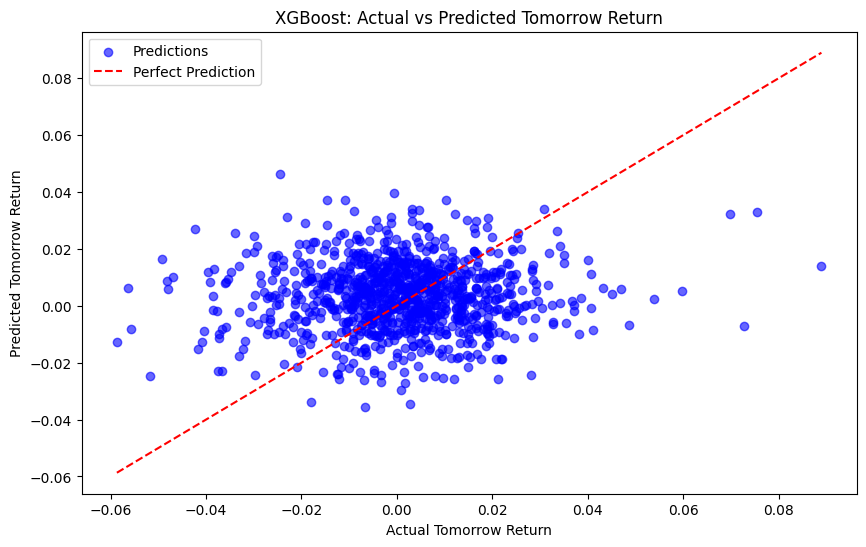

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assume 'appl' is a DataFrame already loaded with the required columns.
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal',
                    'Return', 'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3']

# Features and target
X = appl[selected_columns]
y = appl['Tomorrow_Return']

split_point = int(0.8 * len(X))

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model


xgb_model.fit(X_train, y_train)

x_val = X_test
y_val = y_test
# Make predictions on the test set
y_pred = xgb_model.predict(x_val)

# Compute evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print("XGBoost Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='b', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Tomorrow Return')
plt.ylabel('Predicted Tomorrow Return')
plt.title('XGBoost: Actual vs Predicted Tomorrow Return')
plt.legend()




XGBoost Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0074
Mean Absolute Error (MAE): 0.0054
R² Score: 0.8763


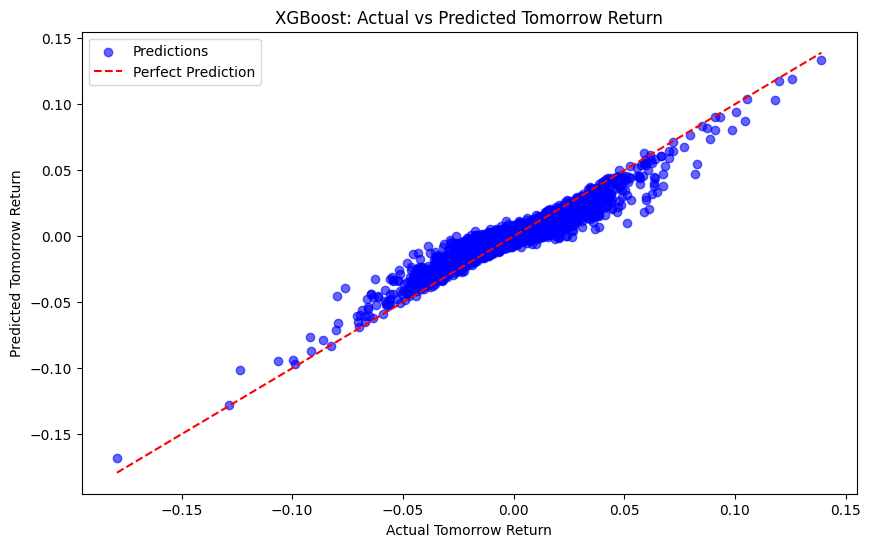

In [ ]:
x_val = X_train
y_val = y_train
# Make predictions on the test set
y_pred = xgb_model.predict(x_val)

# Compute evaluation metrics
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print("XGBoost Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='b', label='Predictions')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Tomorrow Return')
plt.ylabel('Predicted Tomorrow Return')
plt.title('XGBoost: Actual vs Predicted Tomorrow Return')
plt.legend()
plt.show()

# Classifier evaluation  



| Actual \\ Predicted | Positive (Predicted) | Negative (Predicted) |
|--------------------|---------------------|---------------------|
| **Positive (Actual)**  | True Positive (TP)  | False Negative (FN)  |
| **Negative (Actual)**  | False Positive (FP)  | True Negative (TN)  |


## 1. **Accuracy**  
**Concept:** Measures the proportion of correctly classified instances out of all instances.  

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$  


**Example:** A credit scoring model classifies loans as “good” or “bad.” If 95 out of 100 loans are correctly classified, accuracy is 95%. However, if only 5% of loans are actually “bad,” a model always predicting “good” would also achieve 95% accuracy—highlighting its limitations with imbalanced data.  





## 2. **Precision**  
**Concept:** Measures how many of the predicted positive cases are actually positive.  


$$
\text{Precision} = \frac{TP}{TP + FP}
$$  

**Example:** In fraud detection, if a system flags 100 transactions as fraudulent but only 60 are actually fraudulent, precision is 60%. A high precision ensures that flagged transactions are likely real fraud cases, reducing false alarms that waste resources and frustrate customers.  





## 3. **Recall (Sensitivity)**  
**Concept:** Measures the proportion of actual positive cases that are correctly identified by the model.  


$$
\text{Recall} = \frac{TP}{TP + FN}
$$  

**Example:** In medical diagnostics, missing a true case of a disease can be critical. If a model detects 80 out of 100 actual cases, recall is 80%. High recall ensures most positive cases are captured, even at the cost of some false positives. In finance, high recall in default detection helps ensure risky loans are identified.  





## 4. **F1 Score**  
**Concept:** The harmonic mean of precision and recall, ensuring a balance between them.  


$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$  

**Example:** A spam filter needs both high precision (to avoid misclassifying legitimate emails) and high recall (to catch most spam). The F1 score ensures neither metric dominates. Similarly, in fraud detection, a good balance prevents missing fraud cases while minimizing unnecessary customer disruptions.  



---

## 5. **ROC Curve & AUC**  
**Concept:**  
- The **ROC Curve** plots the trade-off between True Positive Rate (Recall) and False Positive Rate (FPR).  
- **AUC (Area Under the Curve)** measures the model’s ability to distinguish between classes.  

**Mathematical Definitions:**  
- **True Positive Rate (Recall):**  
  $$
  TPR = \frac{TP}{TP + FN}
  $$  
- **False Positive Rate:**  
  $$
  FPR = \frac{FP}{FP + TN}
  $$  

**Example:** In credit risk assessment, adjusting the threshold for labeling loans as risky affects the balance between correctly identified defaulters (TPR) and incorrectly flagged non-defaulters (FPR). A high AUC indicates strong performance in distinguishing between risky and non-risky loans.  





AUC: 0.8400


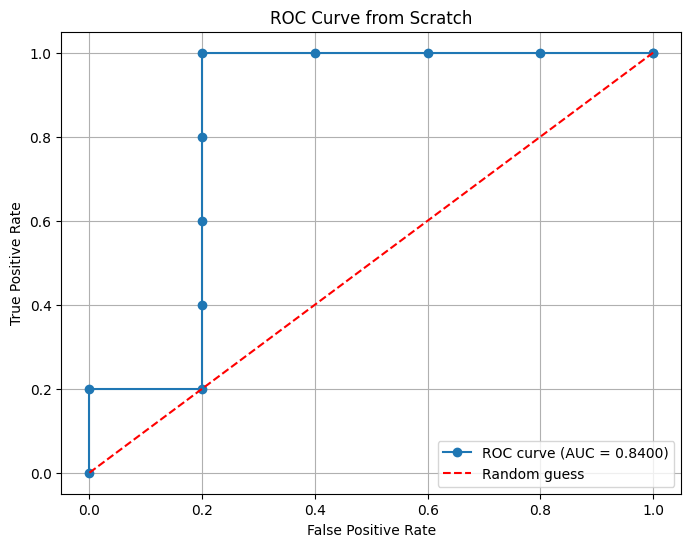

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: true binary labels and predicted probabilities
# In a real scenario, these come from your classifier
y_true = np.array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.65, 0.2, 0.3, 0.9, 0.05, 0.7])

def compute_roc_auc(y_true, y_scores):
    # Sort thresholds: include 1 and 0 to capture full range
    thresholds = np.sort(np.unique(y_scores))[::-1]
    thresholds = np.concatenate(([1.1], thresholds, [-0.1]))  # adding beyond extreme thresholds

    tpr_list = []
    fpr_list = []

    P = np.sum(y_true == 1)  # total positives
    N = np.sum(y_true == 0)  # total negatives

    for thresh in thresholds:
        # Predict positive if score >= threshold
        y_pred = (y_scores >= thresh).astype(int)

        # Compute True Positives (TP) and False Positives (FP)
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))

        TPR = TP / P if P else 0  # True Positive Rate (Recall)
        FPR = FP / N if N else 0  # False Positive Rate

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # Convert lists to arrays for plotting and computation
    tpr_array = np.array(tpr_list)
    fpr_array = np.array(fpr_list)

    # Compute AUC using the trapezoidal rule
    auc = np.trapz(tpr_array, fpr_array)

    return fpr_array, tpr_array, auc

# Compute ROC points and AUC
fpr, tpr, auc_value = compute_roc_auc(y_true, y_scores)
print(f"AUC: {auc_value:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label=f'ROC curve (AUC = {auc_value:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve from Scratch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [4]:
cd /content/drive/MyDrive/Math 628/week 5

/content/drive/MyDrive/Math 628/week 5


In [ ]:
from Labeling import *

In [ ]:
prices = appl['Close']
volatility = daily_volatility_with_log_returns(prices, 30)
filter_threshold = 1.5
moelcules = cusum_filter_events_dynamic_threshold(np.log(prices), filter_threshold * volatility)
vertical_barriers = vertical_barrier(prices, moelcules, 20)


triple_barrier_events ,tt = meta_events(prices, vertical_barriers.index, [1, 1], volatility, 0, 1, vertical_barriers)
labels = meta_labeling(triple_barrier_events, prices)

In [ ]:
apple_new = pd.merge(appl, labels, left_index=True, right_index=True)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)

# Assume apple_new is a pre-loaded DataFrame with your data
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI',
                    'MACD', 'MACD_Signal', 'Return', 'Lag_Return_1',
                    'Lag_Return_2', 'Lag_Return_3']

# Filter the dataset to include only rows with label -1 and 1
apple_new = apple_new[apple_new['Label'].isin([-1, 1])]

X = apple_new[selected_columns]
y = apple_new['Label']

split_point = int(0.75 * len(X))

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_classifier.fit(X_train ,y_train)
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Standard Classification Metrics (scikit-learn):")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Standard Classification Metrics (scikit-learn):
Accuracy:  0.5991
Precision: 0.6184
Recall:    0.7287
F1 Score:  0.6690
Confusion Matrix:
[[45 58]
 [35 94]]


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"\nscikit-learn AUC: {roc_auc:.4f}")


scikit-learn AUC: 0.5702


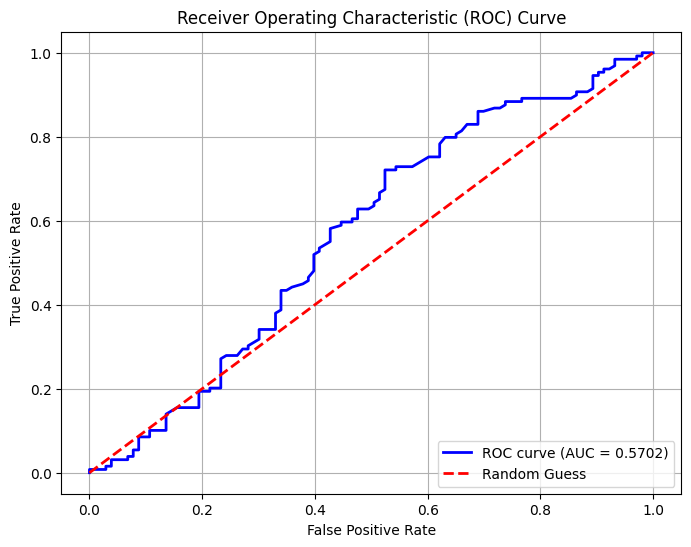

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

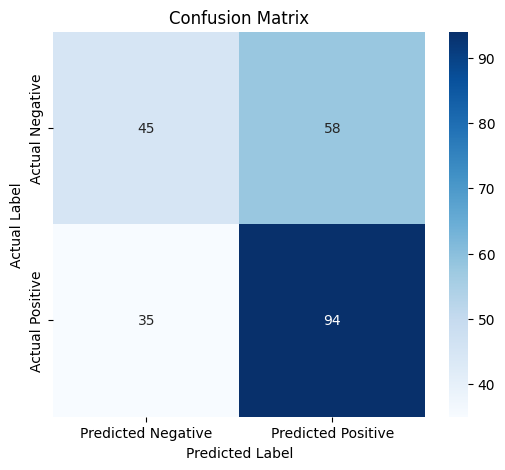

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced' , random_state=42)


# Train the model
rf_classifier.fit(X_train ,y_train)
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print(f"\nscikit-learn AUC: {roc_auc:.4f}")


scikit-learn AUC: 0.5446


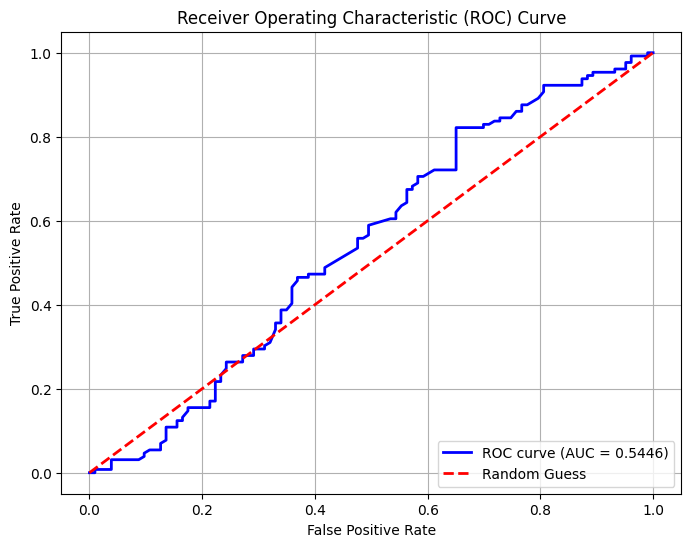

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

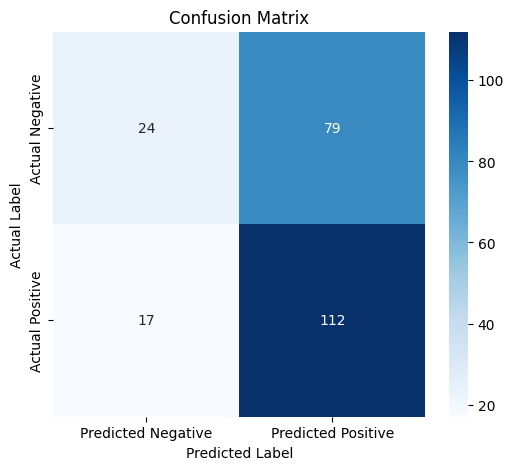

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


# Cross Validation(Not for Time Series!)

---





Cross validation estimates a model’s generalization ability by partitioning the dataset into multiple subsets (folds) for repeated training and evaluation.  

Given a dataset:  
$$ D = \{(x_i, y_i)\}_{i=1}^{n} $$  
where $ n $ is the number of samples, cross validation splits $ D $ into $ k $ disjoint folds:  
$$ D = D_1 \cup D_2 \cup \cdots \cup D_k, \quad D_i \cap D_j = \emptyset \quad \text{for } i \neq j. $$  
For each fold $ i $:  
- Train on $ D_{\text{train}}^{(i)} = D \setminus D_i $  
- Validate on $ D_i $  

The overall error estimate is:  
$$ \bar{E} = \frac{1}{k} \sum_{i=1}^{k} E_i. $$  

---

**Benefits**  

1. **Generalization Estimation** – Reliable performance estimation across multiple folds.  
2. **Overfitting Detection** – Detects variance in model performance.  
3. **Efficient Data Usage** – Every sample is used for training and validation.  
4. **Model Selection** – Provides stable evaluation for hyperparameters and algorithms.  



## **K-Fold Cross Validation**  

Splits data into $ k $ subsets and iteratively trains on $ k-1 $ folds while validating on the remaining fold.  

- Train on:  
  $$ D_{\text{train}}^{(i)} = D \setminus D_i $$  
- Compute validation error $ E_i $ on $ D_i $.  
- Final evaluation:  
  $$ \bar{E} = \frac{1}{k} \sum_{i=1}^{k} E_i. $$  

**Accuracy Formula:**  
$$ \text{Accuracy}_{\text{CV}} = \frac{1}{k} \sum_{i=1}^{k} \frac{\text{Correct Predictions in } D_i}{\text{Total Samples in } D_i}. $$  


## **Stratified K-Fold Cross Validation**  

Ensures each fold maintains class distribution, crucial for imbalanced datasets.  

If class proportions are:  
$$ p_{\text{positive}}, \quad p_{\text{negative}} = 1 - p_{\text{positive}}, $$  
each fold $ D_i $ satisfies:  
$$ \frac{n_{j,i}}{|D_i|} \approx \frac{n_j}{n}, $$  
where $ n_{j,i} $ is the count of class $ j $ in fold $ i $.  

**Advantages:**  
- **Reduced Variance** – More stable performance estimation.  
- **Fair Comparison** – Preserves class ratios, ensuring reliable metric calculations.  


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# -------------------------
# Load the Adult Dataset
# -------------------------
adult = fetch_openml(name='adult', version=2, as_frame=True)
df = adult.frame

# Map target values: '>50K' to 1 and '<=50K' to 0
df['class'] = df['class'].map({'>50K': 1, '<=50K': 0})

# -------------------------
# Create a Training and Test Set
# -------------------------
# First, randomly sample 5000 datapoints for training.
df_train = df.sample(n=5000, random_state=42)

# Next, sample 2000 datapoints for testing from the remaining data.
remaining_df = df.drop(df_train.index)
df_test = remaining_df.sample(n=2000, random_state=42)

print("Training Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)

# -------------------------
# Preprocessing Setup
# -------------------------
# Define features and target for training and testing
def prepare_data(df):
    X = df.drop('class', axis=1)
    y = df['class']
    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    return X, y, numerical_cols, categorical_cols

X_train, y_train, num_cols_train, cat_cols_train = prepare_data(df_train)
X_test, y_test, num_cols_test, cat_cols_test = prepare_data(df_test)

# Since the columns remain the same between training and test, we can use the same preprocessor:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_train),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_train)
    ])

# Create a pipeline with the preprocessor and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])


Training Data Shape: (5000, 15)
Test Data Shape: (2000, 15)


Standard K-Fold Cross Validation Accuracy Scores on Training Data:
[0.832 0.808 0.808 0.816 0.804 0.806 0.816 0.838 0.818 0.814]
Mean Accuracy (K-Fold): 0.8160 ± 0.0106

Stratified K-Fold Cross Validation Accuracy Scores on Training Data:
[0.81  0.818 0.8   0.802 0.786 0.804 0.806 0.798 0.802 0.836]
Mean Accuracy (Stratified K-Fold): 0.8062 ± 0.0126

Test Accuracy on the 2000-Point Test Set: 0.8075


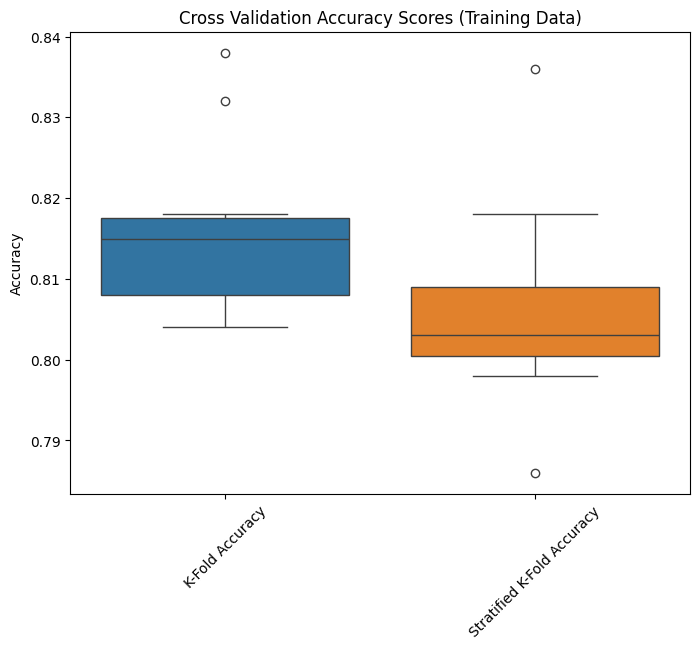

In [29]:

# -------------------------
# Cross Validation on Training Data
# -------------------------
# Standard K-Fold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_kfold = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')

# Stratified K-Fold
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_skfold = cross_val_score(pipeline, X_train, y_train, cv=skfold, scoring='accuracy')

print("Standard K-Fold Cross Validation Accuracy Scores on Training Data:")
print(cv_scores_kfold)
print(f"Mean Accuracy (K-Fold): {np.mean(cv_scores_kfold):.4f} ± {np.std(cv_scores_kfold):.4f}")

print("\nStratified K-Fold Cross Validation Accuracy Scores on Training Data:")
print(cv_scores_skfold)
print(f"Mean Accuracy (Stratified K-Fold): {np.mean(cv_scores_skfold):.4f} ± {np.std(cv_scores_skfold):.4f}")

# -------------------------
# Train on Full Training Data and Evaluate on Test Data
# -------------------------
pipeline.fit(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print(f"\nTest Accuracy on the 2000-Point Test Set: {test_accuracy:.4f}")

# -------------------------
# Visualization: Boxplot of Cross Validation Scores
# -------------------------
cv_results = {
    'K-Fold Accuracy': cv_scores_kfold,
    'Stratified K-Fold Accuracy': cv_scores_skfold
}
cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(8, 6))
sns.boxplot(data=cv_df)
plt.title('Cross Validation Accuracy Scores (Training Data)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


## **Grid Search**  



Grid search systematically tunes hyperparameters by evaluating all possible combinations from predefined candidate sets.  

- **Hyperparameter Space:**  
  Given a model $ f(x; \theta) $, where hyperparameters are  
  $$ \theta = (\theta_1, \theta_2, \dots, \theta_d) $$  
  and each hyperparameter $ \theta_i $ belongs to a candidate set $ \mathcal{G}_i $, the full search space is:  
  $$ \mathcal{G} = \mathcal{G}_1 \times \mathcal{G}_2 \times \dots \times \mathcal{G}_d. $$  

- **Performance Evaluation:**  
  For each combination $ \theta \in \mathcal{G} $, model performance is estimated using cross validation:  
  $$ E(\theta) = \frac{1}{k} \sum_{i=1}^{k} E^{(i)}(\theta), $$  
  where $ E^{(i)}(\theta) $ is the error on the $ i $-th fold of $ k $-fold cross validation.  

- **Optimization Objective:**  
  The optimal hyperparameter set minimizes the error:  
  $$ \theta^* = \arg\min_{\theta \in \mathcal{G}} E(\theta). $$  


In [31]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4]
}


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=skf,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score from cross validation
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross Validation Accuracy: {grid_search.best_score_:.4f}")

# -------------------------
# Evaluate the Best Model on the Test Data
# -------------------------
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy on the 2000-Point Test Set: {test_accuracy:.4f}")


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 200}
Best Cross Validation Accuracy: 0.8318
Test Accuracy on the 2000-Point Test Set: 0.8275


# Cross Validation for Time series

## **Purged k-Fold Cross Validation**  


In time series modeling, adjacent observations are correlated. Standard k-fold cross validation can introduce information leakage if training and test splits are too close in time. **Purged k-Fold Cross Validation** mitigates this by removing a **purge window** around the test set, preventing temporal proximity from biasing performance estimates.  



- **Dataset:** Given a time series dataset:  
  $$ D = \{(x_t, y_t)\}_{t=1}^{T} $$  
  where $ T $ is the total number of time steps.  

- **Test Set for Fold $ i $:**  
  $$ \mathcal{T}_i \subset \{1, 2, \dots, T\}. $$  

- **Purge Window:** A set of indices excluded from training, defined as:  
  $$ P_i = \{ t : t \in [t_{\min}(\mathcal{T}_i)-\delta, t_{\min}(\mathcal{T}_i)) \cup (t_{\max}(\mathcal{T}_i), t_{\max}(\mathcal{T}_i)+\delta] \}. $$  
  Here, $ \delta $ is the purge window size, and $ t_{\min}(\mathcal{T}_i) $, $ t_{\max}(\mathcal{T}_i) $ are the time indices of the test set.  

---

### **Training and Validation Sets**  

For each fold $ i $:  

- **Validation Set:**  
  $$ D_{\text{val}}^{(i)} = \{(x_t, y_t) : t \in \mathcal{T}_i \}. $$  

- **Purged Training Set:**  
  $$ D_{\text{train}}^{(i)} = D \setminus (\mathcal{T}_i \cup P_i). $$  

This ensures training data does not include temporally proximate observations.  

---

### **Performance Estimation**  

The model $ f(\cdot; \theta) $ is trained on $ D_{\text{train}}^{(i)} $ and evaluated on $ D_{\text{val}}^{(i)} $, yielding error:  
$$ E^{(i)}(\theta) = \text{Error}\Big( f(\cdot; \theta) \text{ trained on } D_{\text{train}}^{(i)},\, D_{\text{val}}^{(i)} \Big). $$  
The overall cross validation estimate is:  
$$ E(\theta) = \frac{1}{k} \sum_{i=1}^{k} E^{(i)}(\theta). $$  



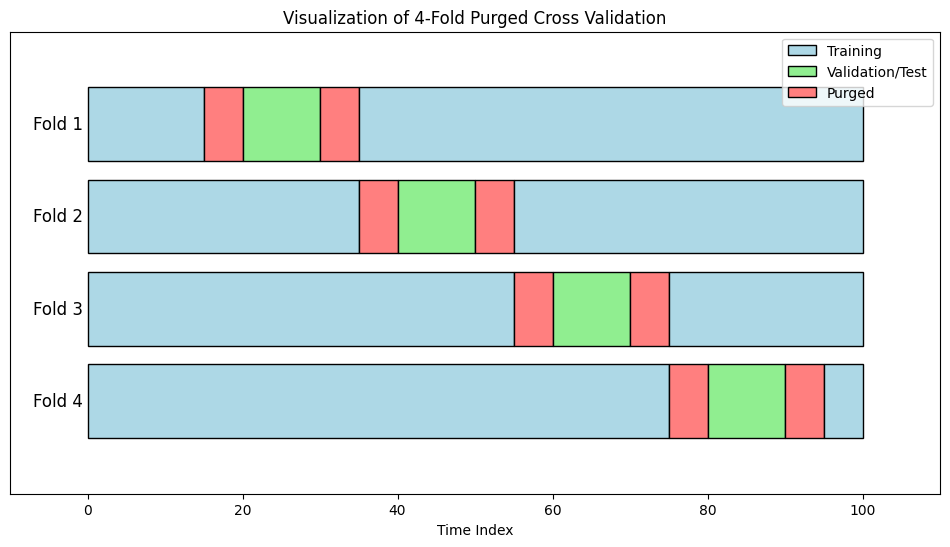

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Setup figure
fig, ax = plt.subplots(figsize=(12, 6))
timeline_length = 100  # e.g., time indices from 0 to 100


folds = [
    {'fold': 1, 'test': (20, 10), 'purge_before': (15, 5), 'purge_after': (30, 5)},
    {'fold': 2, 'test': (40, 10), 'purge_before': (35, 5), 'purge_after': (50, 5)},
    {'fold': 3, 'test': (60, 10), 'purge_before': (55, 5), 'purge_after': (70, 5)},
    {'fold': 4, 'test': (80, 10), 'purge_before': (75, 5), 'purge_after': (90, 5)}
]

# Define colors for different segments
color_train = '#ADD8E6'  # light blue for training
color_test  = '#90EE90'  # light green for validation/test
color_purge = '#FF7F7F'  # light red for purged areas

# Define y positions for each fold's bar
y_positions = [3, 2, 1, 0]

for idx, fold in enumerate(folds):
    y = y_positions[idx]
    # Unpack segment definitions
    purge_before_start, purge_before_width = fold['purge_before']
    test_start, test_width = fold['test']
    purge_after_start, purge_after_width = fold['purge_after']

    # Training segment 1: from 0 to start of purge before
    rect_train1 = patches.Rectangle((0, y-0.4), purge_before_start, 0.8,
                                    facecolor=color_train, edgecolor='black')
    ax.add_patch(rect_train1)

    # Purge before: from purge_before_start to test_start
    rect_purge1 = patches.Rectangle((purge_before_start, y-0.4),
                                    test_start - purge_before_start, 0.8,
                                    facecolor=color_purge, edgecolor='black')
    ax.add_patch(rect_purge1)

    # Test (Validation) segment: from test_start to test_start + test_width
    rect_test = patches.Rectangle((test_start, y-0.4), test_width, 0.8,
                                  facecolor=color_test, edgecolor='black')
    ax.add_patch(rect_test)

    # Purge after: from purge_after_start to purge_after_start + purge_after_width
    rect_purge2 = patches.Rectangle((purge_after_start, y-0.4), purge_after_width, 0.8,
                                    facecolor=color_purge, edgecolor='black')
    ax.add_patch(rect_purge2)

    # Training segment 2: from end of purge after to timeline end
    rect_train2 = patches.Rectangle((purge_after_start + purge_after_width, y-0.4),
                                    timeline_length - (purge_after_start + purge_after_width), 0.8,
                                    facecolor=color_train, edgecolor='black')
    ax.add_patch(rect_train2)

    # Annotate the fold number on the left side of the bar
    ax.text(-7, y, f'Fold {fold["fold"]}', verticalalignment='center', fontsize=12)

# Set axis limits and labels
ax.set_xlim(-10, timeline_length + 10)
ax.set_ylim(-1, 4)
ax.set_xlabel('Time Index')
ax.set_yticks([])  # Hide y-axis labels
ax.set_title('Visualization of 4-Fold Purged Cross Validation')

# Create a custom legend
legend_elements = [
    patches.Patch(facecolor=color_train, edgecolor='black', label='Training'),
    patches.Patch(facecolor=color_test,  edgecolor='black', label='Validation/Test'),
    patches.Patch(facecolor=color_purge, edgecolor='black', label='Purged')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()


In [1]:
from sklearn.model_selection import KFold
import numpy as np

def purged_kfold_indices(n_samples, n_splits=5, purge_size=0):
    """
    Generate train-test indices for Purged k-Fold Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_splits (int): Number of folds.
    - purge_size (int): Number of samples to exclude before and after the test set.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    kf = KFold(n_splits=n_splits, shuffle=False)
    indices = np.arange(n_samples)

    folds = []
    for train_idx, test_idx in kf.split(indices):
        test_start, test_end = test_idx[0], test_idx[-1]

        # Define the purge window
        purge_start = max(0, test_start - purge_size)
        purge_end = min(n_samples, test_end + purge_size + 1)

        # Remove purged indices from training set
        train_idx = np.setdiff1d(train_idx, np.arange(purge_start, purge_end))

        folds.append((train_idx, test_idx))

    return folds

# Example usage
n_samples = 100
n_splits = 5
purge_size = 2
folds = purged_kfold_indices(n_samples, n_splits, purge_size)

for i, (train_idx, test_idx) in enumerate(folds):
    print(f"Fold {i+1}:")
    print(f"Train indices: {train_idx}")
    print(f"Test indices: {test_idx}\n")


Fold 1:
Train indices: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96 97 98 99]
Test indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

Fold 2:
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Test indices: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]

Fold 3:
Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Test indices: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 

Fold 1 - RMSE: 0.0280
Fold 2 - RMSE: 0.0360
Fold 3 - RMSE: 0.0178
Fold 4 - RMSE: 0.0207
Fold 5 - RMSE: 0.0164
Fold 6 - RMSE: 0.0171
Fold 7 - RMSE: 0.0193
Fold 8 - RMSE: 0.0244
Fold 9 - RMSE: 0.0209
Fold 10 - RMSE: 0.0193


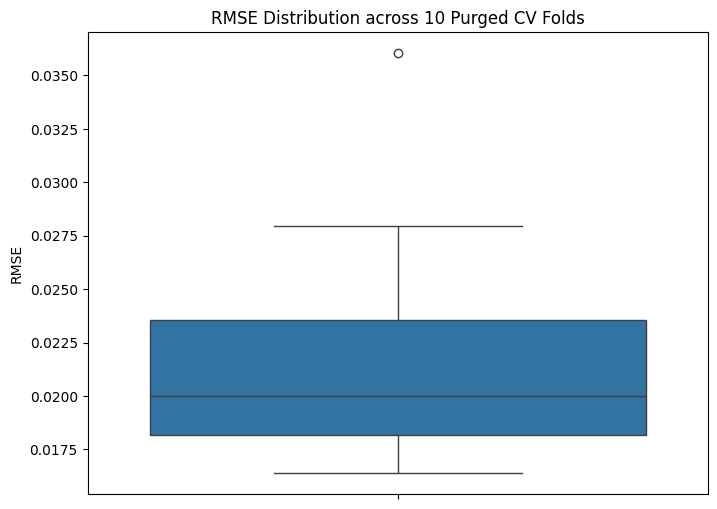

In [12]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal',
                    'Return', 'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3']

X = appl[selected_columns].values
y = appl['Tomorrow_Return'].values


n_samples = X.shape[0]


purge_size = 10


folds = purged_kfold_indices(n_samples, n_splits=10, purge_size=purge_size)


rmse_scores = []

for fold, (train_idx, test_idx) in enumerate(folds, 1):
    # Extract training and test data for this fold
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Fit the model
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute the RMSE for the fold
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    print(f"Fold {fold} - RMSE: {rmse:.4f}")


#---------------------------------------------------------------------
# Visualization: Boxplot of RMSE Scores
#---------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=rmse_scores)
plt.ylabel('RMSE')
plt.title('RMSE Distribution across 10 Purged CV Folds')
plt.show()


## **Combinatorial Purged Cross-Validation (CPCV)**



- **Dataset Partitioning:**  
  Given $ T $ observations:  
  $$ D = \{(x_t, y_t)\}_{t=1}^{T} $$  
  Partition into $ N $ contiguous groups:  
  $$ \mathcal{G}_1, \mathcal{G}_2, \dots, \mathcal{G}_N, $$  
  ensuring:  
  $$ \bigcup_{i=1}^{N} \mathcal{G}_i = \{1, 2, \dots, T\}, \quad \mathcal{G}_i \cap \mathcal{G}_j = \emptyset \text{ for } i \neq j. $$  

- **Combinatorial Selection of Test Sets:**  
  Instead of a single test fold, CPCV considers **all** $ k $-group test selections:  
  $$ \binom{N}{k} = \frac{N!}{k!(N-k)!}. $$  
  Remaining $ N-k $ groups form an initial training set.  

- **Purging to Prevent Leakage:**  
  Define **purge window** $ \mathcal{P}_i $ for test set $ \mathcal{T}_i $:  
  $$ \mathcal{D}_{\text{train}}^{(i)} = \left( \bigcup_{j=1}^{N} \mathcal{G}_j \setminus \mathcal{T}_i \right) \setminus \mathcal{P}_i. $$  
  This removes training points near test indices to **avoid overlap and leakage**.  


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import combinations
from sklearn.model_selection import KFold

def combinatorial_purged_cv_indices(n_samples, n_partitions=5, k=1, purge_size=0):
    """
    Generate train-test indices for Combinatorial Purged Cross Validation.

    Parameters:
    - n_samples (int): Total number of samples.
    - n_partitions (int): Number of contiguous partitions to split the data into.
    - k (int): Number of partitions to select for the test set.
    - purge_size (int): Number of samples to exclude before and after each test partition.

    Returns:
    - List of (train_indices, test_indices) tuples.
    """
    # 1. Partition the data contiguously
    partition_size = n_samples // n_partitions
    remainder = n_samples % n_partitions
    partition_boundaries = []
    start_idx = 0
    for i in range(n_partitions):
        size = partition_size + (1 if i < remainder else 0)
        end_idx = start_idx + size
        partition_boundaries.append((start_idx, end_idx))
        start_idx = end_idx

    # 2. Generate all combinations of partitions of size k for the test set
    partition_indices = range(n_partitions)
    test_combos = list(combinations(partition_indices, k))

    folds = []
    all_indices = np.arange(n_samples)
    for combo in test_combos:
        # Build test indices from the selected partitions
        test_indices_list = []
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            test_indices_list.append(np.arange(start, end))
        test_indices = np.concatenate(test_indices_list)

        # Start with all indices; remove test indices
        train_mask = np.ones(n_samples, dtype=bool)
        train_mask[test_indices] = False

        # 3. Purge a window before and after each test partition
        for part_id in combo:
            start, end = partition_boundaries[part_id]
            purge_start = max(0, start - purge_size)
            purge_end = min(n_samples, end + purge_size)
            train_mask[purge_start:purge_end] = False

        train_idx = np.where(train_mask)[0]
        folds.append((train_idx, test_indices))

    return folds


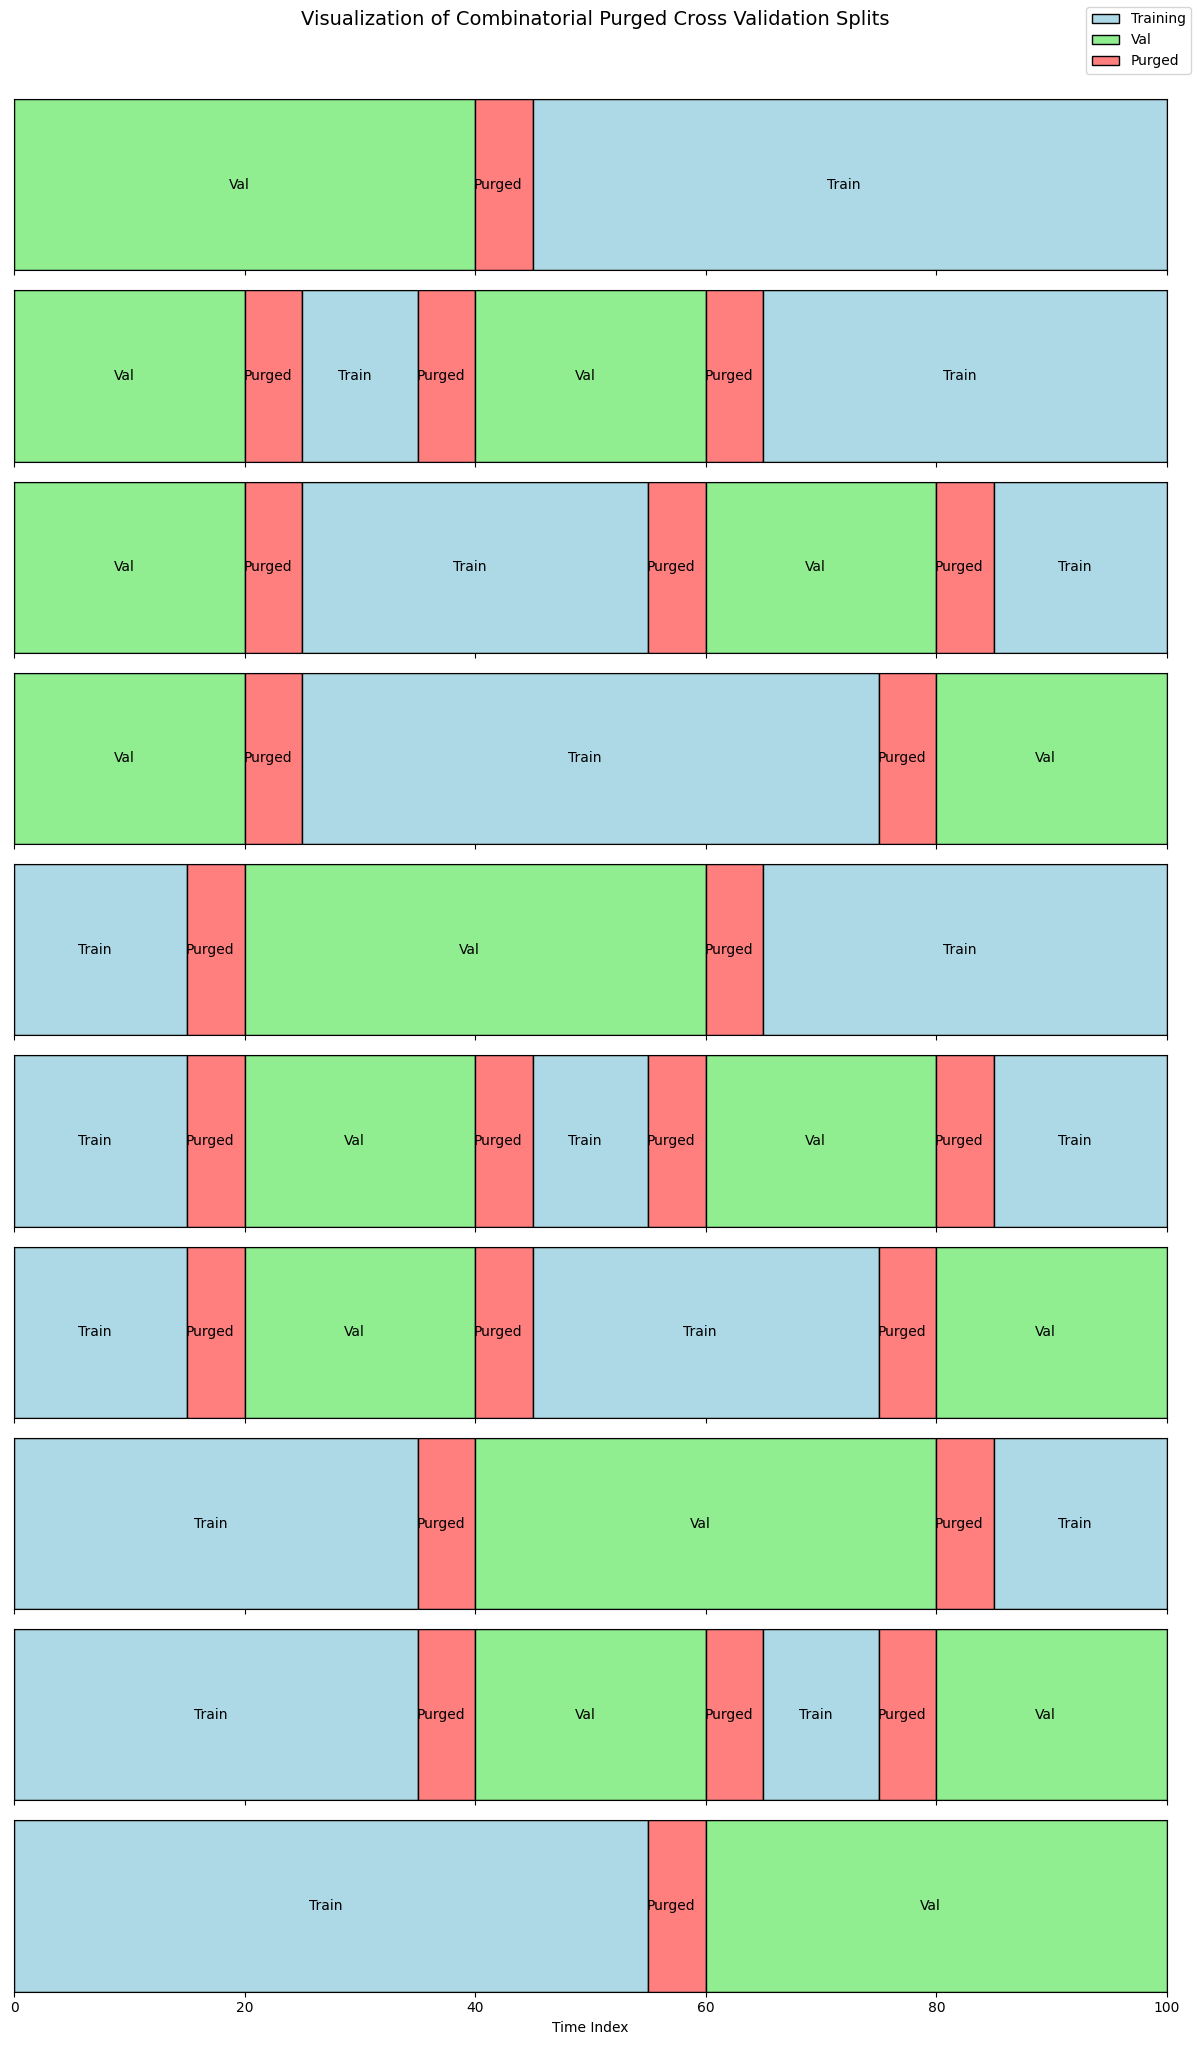

In [21]:

n_samples = 100
n_partitions = 5
k = 2
purge_size = 5

folds = combinatorial_purged_cv_indices(n_samples, n_partitions, k, purge_size)

n_plots = len(folds)


color_map = {'Train': '#ADD8E6', 'Val': '#90EE90', 'Purged': '#FF7F7F'}

fig, axes = plt.subplots(n_plots, 1, figsize=(12, 2*n_plots), sharex=True)

if n_plots == 1:
    axes = [axes]  # Ensure axes is iterable

for i in range(n_plots):
    train_idx, test_idx = folds[i]
    all_idx = np.arange(n_samples)

    purge_idx = sorted(list(set(all_idx) - set(train_idx) - set(test_idx)))

    # Create a category array for each time index: 'Train', 'Test', or 'Purged'
    categories = np.empty(n_samples, dtype=object)
    for j in range(n_samples):
        if j in train_idx:
            categories[j] = 'Train'
        elif j in test_idx:
            categories[j] = 'Val'
        else:
            categories[j] = 'Purged'

    segments = []
    current_cat = categories[0]
    start = 0
    for j in range(1, n_samples):
        if categories[j] != current_cat:
            segments.append((start, j-1, current_cat))
            current_cat = categories[j]
            start = j
    segments.append((start, n_samples-1, current_cat))

    ax = axes[i]
    # Plot each segment as a rectangle
    for seg in segments:
        s, e, cat = seg
        ax.add_patch(patches.Rectangle((s, 0), e-s+1, 1, facecolor=color_map[cat], edgecolor='black'))
        ax.text((s+e)/2, 0.5, cat, ha='center', va='center', fontsize=10, color='black')
    ax.set_xlim(0, n_samples)
    ax.set_ylim(0, 1)
    ax.set_yticks([])


# Common X label and overall title
axes[-1].set_xlabel('Time Index')
fig.suptitle('Visualization of Combinatorial Purged Cross Validation Splits', fontsize=14, y=1.02)

# Custom legend
legend_elements = [
    patches.Patch(facecolor=color_map['Train'], edgecolor='black', label='Training'),
    patches.Patch(facecolor=color_map['Val'], edgecolor='black', label='Val'),
    patches.Patch(facecolor=color_map['Purged'], edgecolor='black', label='Purged')
]
fig.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

Fold 1 - RMSE: 0.0278
Fold 2 - RMSE: 0.0261
Fold 3 - RMSE: 0.0273
Fold 4 - RMSE: 0.0286
Fold 5 - RMSE: 0.0189
Fold 6 - RMSE: 0.0209
Fold 7 - RMSE: 0.0211
Fold 8 - RMSE: 0.0192
Fold 9 - RMSE: 0.0198
Fold 10 - RMSE: 0.0221


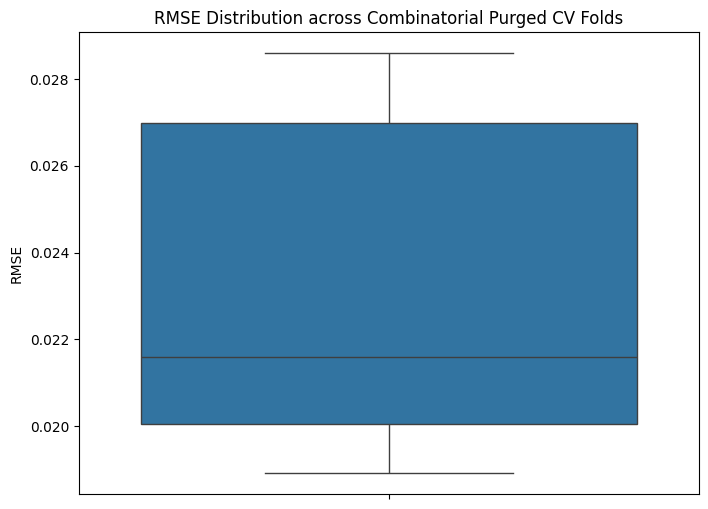

In [20]:
n_samples = X.shape[0]

n_partitions = 5
k = 2
purge_size = 10


folds = combinatorial_purged_cv_indices(n_samples, n_partitions, k, purge_size)


rmse_scores = []

for fold, (train_idx, test_idx) in enumerate(folds, 1):
    # Extract training and test data for this fold.
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Fit the model using XGBRegressor.
    model = XGBRegressor(objective='reg:squarederror', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute the RMSE for the fold.
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    print(f"Fold {fold} - RMSE: {rmse:.4f}")


plt.figure(figsize=(8, 6))
sns.boxplot(data=rmse_scores)
plt.ylabel('RMSE')
plt.title('RMSE Distribution across Combinatorial Purged CV Folds')
plt.show()
